**Alumno:** Daniel Ivan Cruz Flores

**Curso:** Aplicaciones para Sistemas de Información Sanitaria y Dispositivos Móviles

In [31]:
#TODO: Comentar todo el cuaderno lo más profundamente
#Importación de librerías
#numpy fundamental para gestión de arrays N-dimensionales
import numpy as np
#scipy para cálculo numérico, álgebra lineal, etc. Ambos básicos para computación científica
import scipy as sc
#matplotlib Gráficas
import matplotlib.pyplot as plt
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html Permite dibujar un par de círculos
from sklearn import datasets

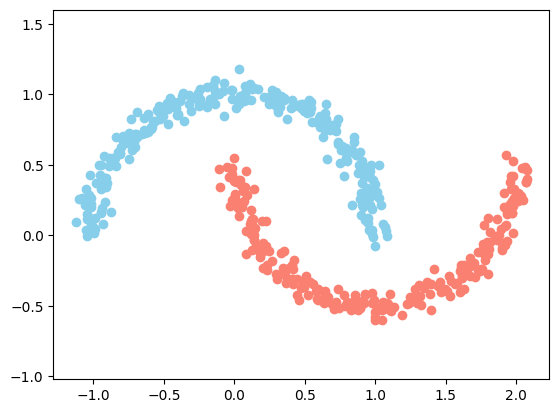

In [187]:
# CREAR EL DATASET

n = 500
p = 2

#X, Y = datasets.make_circles(n_samples=n, factor=0.5, noise=0.05)

#TODO: Probar con este otro dataset
X, Y = datasets.make_moons(n_samples=n, noise=0.05)# dataset que genera datos en medialuna

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] == 0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

Se define la clase principal a usar, corresponde a la capa de red que contendra n neuronas segun topología.

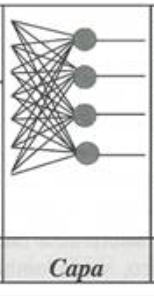

In [188]:
# CLASE DE LA CAPA DE LA RED
class neural_layer():

  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f # funcion de activacion por defecto

    self.b = np.random.rand(1, n_neur)      * 2 - 1 # vector de sesgo o bias
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1 # vector pesos por entrada

**FUNCIONES DE ACTIVACIÓN**

Son funciones matemáticas que se aplican a la salida de cada neurona en una capa de la red.

**Función Sigmoide**

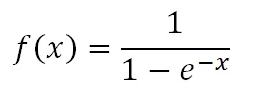

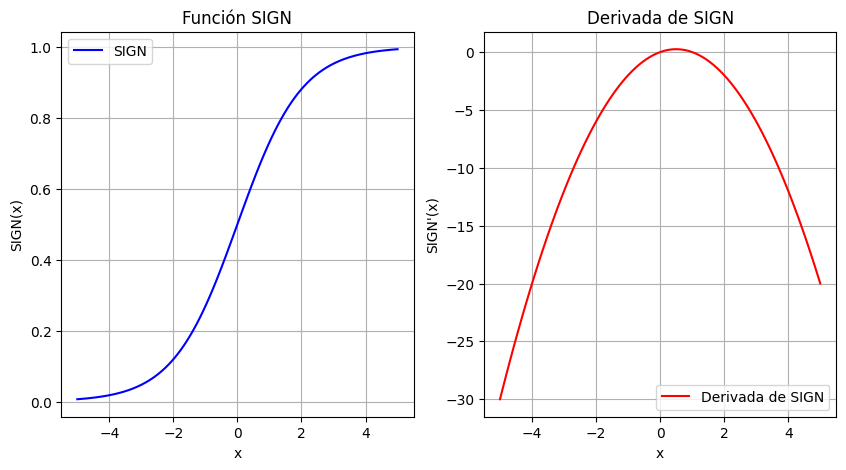

In [189]:
# FUNCIONES DE ACTIVACION
sigm = (lambda x: 1 / (1 + np.e ** (-x)), # función
        lambda x: x * (1 - x)) # derivada de la función

_x = np.linspace(-5, 5, 100)

#plt.plot(_x, sigm[0](_x))
#plt.plot(_x, sigm[1](_x)) #Para visualizar la derivada
#plt.show()

# Graficar las funciones
plt.figure(figsize=(10, 5))

# Función SIGN
plt.subplot(1, 2, 1)
plt.plot(_x,sigm[0](_x), label='SIGN', color='blue')
plt.title('Función SIGN')
plt.xlabel('x')
plt.ylabel('SIGN(x)')
plt.grid(True)
plt.legend()

# Derivada de la función SIGN
plt.subplot(1, 2, 2)
plt.plot(_x, sigm[1](_x), label='Derivada de SIGN', color='red')
plt.title('Derivada de SIGN')
plt.xlabel('x')
plt.ylabel("SIGN'(x)")
plt.grid(True)
plt.legend()

**Función ReLu**

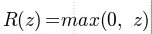

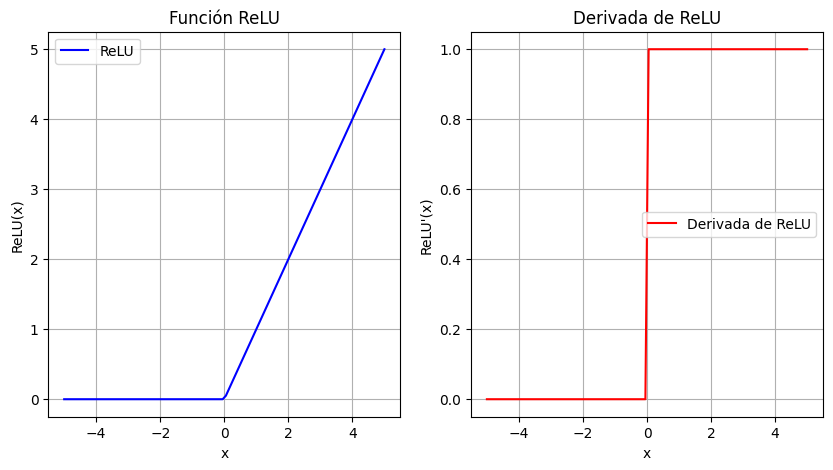

In [190]:
# Función ReLU y su derivada
relu = (lambda x: np.maximum(0, x),
        lambda x:np.where(x < 0, 0, 1))

_x = np.linspace(-5, 5, 100)

# Graficar las funciones
plt.figure(figsize=(10, 5))

# Función ReLU
plt.subplot(1, 2, 1)
plt.plot(_x, relu[0](_x), label='ReLU', color='blue')
plt.title('Función ReLU')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.legend()

# Derivada de la función ReLU
plt.subplot(1, 2, 2)
plt.plot(_x, relu[1](_x), label='Derivada de ReLU', color='red')
plt.title('Derivada de ReLU')
plt.xlabel('x')
plt.ylabel("ReLU'(x)")
plt.grid(True)
plt.legend()


**Exponential Linear Unit (ELU):**

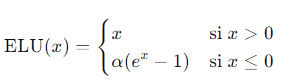

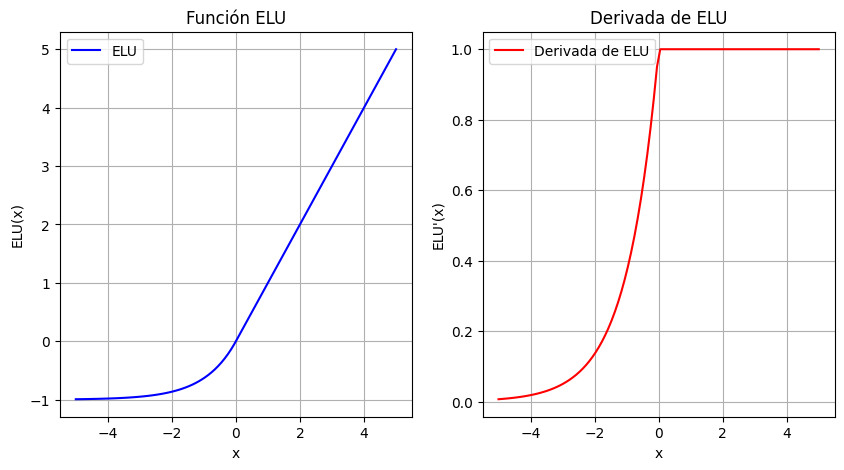

In [191]:

# Función ELU y su derivada
alpha = 1.0
elu = (lambda x: np.where(x > 0, x, alpha * (np.exp(x) - 1)),
       lambda x: np.where(x > 0, 1, elu[0](x) + alpha))

_x = np.linspace(-5, 5, 100)

# Graficar las funciones
plt.figure(figsize=(10, 5))

# Función SIGN
plt.subplot(1, 2, 1)
plt.plot(_x,elu[0](_x), label='ELU', color='blue')
plt.title('Función ELU')
plt.xlabel('x')
plt.ylabel('ELU(x)')
plt.grid(True)
plt.legend()

# Derivada de la función SIGN
plt.subplot(1, 2, 2)
plt.plot(_x, elu[1](_x), label='Derivada de ELU', color='red')
plt.title('Derivada de ELU')
plt.xlabel('x')
plt.ylabel("ELU'(x)")
plt.grid(True)
plt.legend()

In [207]:
################################# FUNCION PARA CREAR LA RED NEURONAL #######################################
def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]): # recorre el arreglo hasta el penultimo elemento
    if l % 2 ==0:
      nn.append(neural_layer(topology[l], topology[l+1],relu)) # a las capas pares se le define la funcion por defecto SIGN
      print(f"Indice l: {l}, Valor layer: {layer}, act: ReLu")
    else:
      nn.append(neural_layer(topology[l], topology[l+1],act_f)) # a las capas impares se le define la funcion ReLU.
      print(f"Indice l: {l}, Valor layer: {layer}, act: SIGN")
    #print()

  return nn

In [208]:
# PARA ENTRENAMIENTO
topology = [p, 4, 8, 1] # estructura por cantidad de neuronas por capas que tendra la red p, 4, 8, 1

neural_net=create_nn(topology, sigm) # se crea la red con la funcion SIGN por defecto

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2), # funcion de coste (error cuadrático medio)
           lambda Yp, Yr: (Yp - Yr))  # derivada

################################# FUNCION DE ENTRENAMIENTO ##############################################
def train(neural_net, X, Y, l2_cost, lr=0.05, train=True):

  out = [(None, X)]

  # Forward pass: PROCESO ADELANTE
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #OJO: Las eles aparecen en negro y los unos en verde
    a = neural_net[l].act_f[0](z)
    out.append((z, a))

  if train:

    # Backward pass : PROCESO BACKPROPAGATION
    deltas = []
    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      if l == len(neural_net) - 1:
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

      # Gradient descent: OPTIMIZACIÓN
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1] # valor predicho de última capa


Indice l: 0, Valor layer: 2, act: ReLu
Indice l: 1, Valor layer: 4, act: SIGN
Indice l: 2, Valor layer: 8, act: ReLu


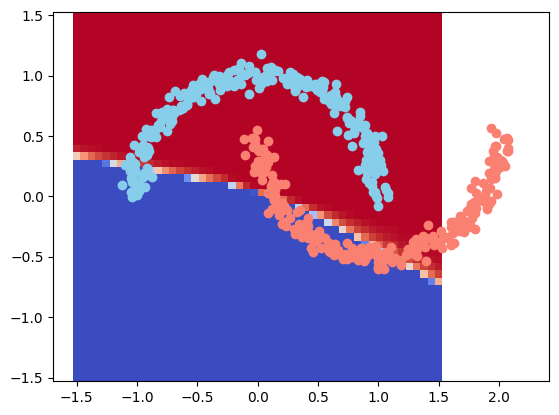

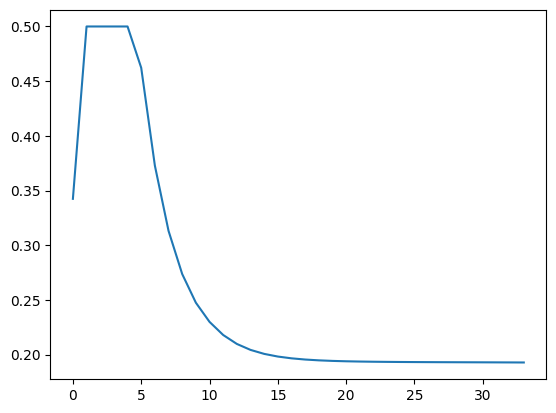

In [211]:
# VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

act_f=sigm
#topology=[p,8,4,1]# Otra posible topología lo normal es pasar de más a menos neuronas por capa
neural_n = create_nn(topology, act_f) # se crea la red a entrenar con la topologia y funcion de activación respectiva

loss = []

for i in range(850): # máximo de iteraciones en entrenamiento (épocas)

  # Entrenemos a la red!
  # se considera learning rate pequeño para que los saltos no sean muy grandes al entrenar
  pY = train(neural_n, X, Y, l2_cost, lr=0.01)

  if i % 25 == 0:

    print(pY)# valor de entrenamiento por iteración

    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res) # límites eje X en la gráfica
    _x1 = np.linspace(-1.5, 1.5, res) # límites eje Y en la gráfica

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    #time.sleep(0.5)  #por si queremos ver los pasos poco a poco